# Capsule Net on MNIST Dataset


##Importing the dependencies

In [1]:
!pip install keras==2.1.2
!pip install tensorflow==1.13.1

     |████████████████████████████████| 307kB 6.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.2 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 92.5MB 47kB/s 
     |████████████████████████████████| 368kB 31.7MB/s 
     |████████████████████████████████| 3.2MB 34.0MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [2]:
import keras
from keras.models import Model
from keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import tensorflow as tf
from keras import initializers
from keras.utils import to_categorical
from keras.layers.core import Activation

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

## Loading and Reshaping the MNIST Data

11493376/11490434 [==============================] - 1s 0us/step


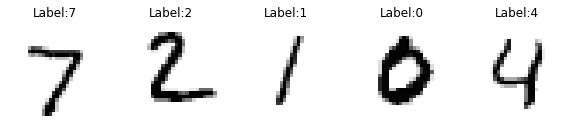

In [3]:
# download training and test data from mnist and reshape it

(x_train, y_orig_train), (x_test, y_orig_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(-1,28,28,1)
y_train = np.array(to_categorical(y_orig_train.astype('float32')))

x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(-1,28,28,1)
y_test = np.array(to_categorical(y_orig_test.astype('float32')))

x_output = x_train.reshape(-1,784)
X_valid_output = x_test.reshape(-1,784)

n_samples = 5

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = x_test[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(y_orig_test[index]))
    plt.axis("off")

plt.show()

## Building  Models

### CNN Model 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### CNN Training

In [5]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
 model.fit(x_train,y_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 47s 790us/step - loss: 0.1410 - acc: 0.9568
Epoch 2/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0499 - acc: 0.9849
Epoch 3/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0362 - acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 46s 759us/step - loss: 0.0274 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 45s 752us/step - loss: 0.0223 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0186 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 46s 759us/step - loss: 0.0156 - acc: 0.9954
Epoch 8/10
60000/60000 [==============================] - 45s 753us/step - loss: 0.0124 - acc: 0.9966
Epoch 9/10
60000/60000 [==============================] - 45s 743us/step - loss: 0.0106 - acc: 0.9970
Epoch 10/10
60000/60000 [=========

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### CNN Evaluation

In [8]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 318us/step


[0.05971947873453582, 0.9868]

In [0]:
#Saving the model
model.save('mnist_cnn.h5')

## Capsule Network
### Step 1: Initial Convolutional Layer

In [0]:
input_shape = Input(shape=(28,28,1))  # size of input image is 28*28
 
# a convolution layer output shape = 20*20*256
conv1 = Conv2D(256, (9,9), activation = 'relu', padding = 'valid')(input_shape)

### Step 2: Primary Capsule Layer


In [0]:
# convolution layer with stride 2 and 256 filters of size 9*9
conv2 = Conv2D(256, (9,9), strides = 2, padding = 'valid')(conv1)
 
# reshape into 1152 capsules of 8 dimensional vectors
reshaped = Reshape((6*6*32,8))(conv2)
 
def squash(inputs):
    # take norm of input vectors
    squared_norm = K.sum(K.square(inputs), axis = -1, keepdims = True)
 
    # use the formula for non-linear function to return squashed output
    return ((squared_norm/(1+squared_norm))/(K.sqrt(squared_norm+K.epsilon())))*inputs

# squash the reshaped output to make length of vector b/w 0 and 1
squashed_output = Lambda(squash)(reshaped)

### Step 3: Digit Capsule Layer



In [0]:
class DigitCapsuleLayer(Layer):
    # creating a layer class in keras
    def __init__(self, **kwargs):
        super(DigitCapsuleLayer, self).__init__(**kwargs)
        self.kernel_initializer = initializers.get('glorot_uniform')
    
    def build(self, input_shape): 
        # initialize weight matrix for each capsule in lower layer
        self.W = self.add_weight(shape = [10, 6*6*32, 16, 8], initializer = self.kernel_initializer, name = 'weights')
        self.built = True
    
    def call(self, inputs):
        inputs = K.expand_dims(inputs, 1)
        inputs = K.tile(inputs, [1, 10, 1, 1])
        # matrix multiplication b/w previous layer output and weight matrix
        inputs = K.map_fn(lambda x: K.batch_dot(x, self.W, [2, 3]), elems=inputs)
        b = tf.zeros(shape = [K.shape(inputs)[0], 10, 6*6*32])
        
        # routing algorithm with updating coupling coefficient c, using scalar product b/w input capsule and output capsule
        for i in range(3-1):
            c = tf.nn.softmax(b, axis=1)
            s = K.batch_dot(c, inputs, [2, 2])
            v = squash(s)
            b = b + K.batch_dot(v, inputs, [2,3])
            
        return v 
    def compute_output_shape(self, input_shape):
        return tuple([None, 10, 16])
    
    
    
def output_layer(inputs):
    return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())
 
digit_caps = DigitCapsuleLayer()(squashed_output)
outputs = Lambda(output_layer)(digit_caps)

### Step 4:  Decoder Network
    

In [0]:
def mask(outputs):
 
    if type(outputs) != list:  # mask at test time
        norm_outputs = K.sqrt(K.sum(K.square(outputs), -1) + K.epsilon())
        y  = K.one_hot(indices=K.argmax(norm_outputs, 1), num_classes = 10)
        y = Reshape((10,1))(y)
        return Flatten()(y*outputs)
 
    else:    # mask at train time
        y = Reshape((10,1))(outputs[1])
        masked_output = y*outputs[0]
        return Flatten()(masked_output)
    
inputs = Input(shape = (10,))
masked = Lambda(mask)([digit_caps, inputs])
masked_for_test = Lambda(mask)(digit_caps)
 
decoded_inputs = Input(shape = (16*10,))
dense1 = Dense(512, activation = 'relu')(decoded_inputs)
dense2 = Dense(1024, activation = 'relu')(dense1)
decoded_outputs = Dense(784, activation = 'sigmoid')(dense2)
decoded_outputs = Reshape((28,28,1))(decoded_outputs)

### Step 5: Training the model

In [0]:
def loss_fn(y_true, y_pred):
 
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + 0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))
 
    return K.mean(K.sum(L, 1))

In [15]:
decoder = Model(decoded_inputs, decoded_outputs)
model = Model([input_shape,inputs],[outputs,decoder(masked)])
test_model = Model(input_shape,[outputs,decoder(masked_for_test)])
 
m = 128
epochs = 3
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss=[loss_fn,'mse'],loss_weights = [1. ,0.0005],metrics=['accuracy'])
model.fit([x_train, y_train],[y_train,x_train],batch_size = m, epochs = epochs, validation_data = ([x_test, y_test],[y_test,x_test]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3744s 62ms/step - loss: 0.2484 - lambda_2_loss: 0.2484 - model_1_loss: 0.0882 - lambda_2_acc: 0.7350 - model_1_acc: 0.8000 - val_loss: 0.0271 - val_lambda_2_loss: 0.0270 - val_model_1_loss: 0.0552 - val_lambda_2_acc: 0.9801 - val_model_1_acc: 0.7964
Epoch 2/3
60000/60000 [==============================] - 3553s 59ms/step - loss: 0.0212 - lambda_2_loss: 0.0212 - model_1_loss: 0.0538 - lambda_2_acc: 0.9849 - model_1_acc: 0.7948 - val_loss: 0.0147 - val_lambda_2_loss: 0.0147 - val_model_1_loss: 0.0528 - val_lambda_2_acc: 0.9894 - val_model_1_acc: 0.7932
Epoch 3/3
60000/60000 [==============================] - 3592s 60ms/step - loss: 0.0142 - lambda_2_loss: 0.0142 - model_1_loss: 0.0531 - lambda_2_acc: 0.9900 - model_1_acc: 0.7942 - val_loss: 0.0127 - val_lambda_2_loss: 0.0126 - val_model_1_loss: 0.0526 - val_lambda_2_acc: 0.9916 - val_model_1_acc: 0.7936


In [0]:
label_predicted, image_predicted = model.predict([x_test, y_test])

### Step 6: Evaluation of capsule network model 

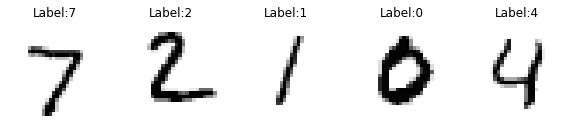

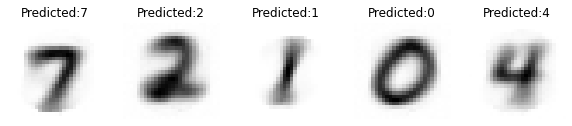

In [17]:
n_samples = 5

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = x_test[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(y_orig_test[index]))
    plt.axis("off")

plt.show()

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = image_predicted[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.title("Predicted:" + str(np.argmax(label_predicted[index])))
    plt.axis("off")

plt.show()

In [0]:
#Saving the model
model.save('mnist_capsnet.h5')